<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


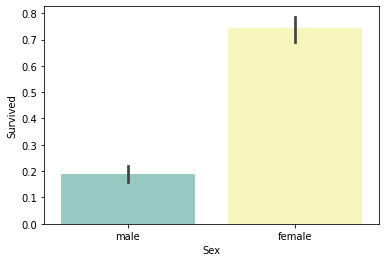

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

test_data['Survived'] = np.nan
df = pd.concat([train_data, test_data], ignore_index=True, sort=False)

# information of df
df.info() 

# The relationship between sex and survival
sns.barplot(x='Sex', y='Survived', data=df, palette='Set3')
plt.show()

In [ ]:
# Age estimated by Random Forest from Pclass, Sex, Parch, SibSp
from sklearn.ensemble import RandomForestRegressor

# Specify the items to be used for estimation
age_df = df[['Age', 'Pclass','Sex','Parch','SibSp']]

# One-hot encoding of label features
age_df = pd.get_dummies(age_df)

